<a href="https://colab.research.google.com/github/agnivachakraborty/LendingClubCaseStudy/blob/master/LendingClubCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Case Study**



### Loading Data


In [43]:
## Establish the connection between google drive and colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [44]:
## Importing the Libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV data from the google drive path
df = pd.read_csv('/content/drive/MyDrive/Upgrad/LendingClubCaseStudy/loan.csv',low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,...,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,...,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,...,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31000,C,C1,...,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79000,B,B5,...,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN


### Data Cleaning

Columns

In [45]:
## Delete columns where all elements are NaN . Have used inplace=True as we do not need these columns for any analysis at all.
# Finding all columns which has all NaN
colsNan = df.isnull().sum() == len(df)
colsNan[colsNan==True]
# Total 54 columns identified with all NaNs
colsNan[colsNan==True].sum()
# Deleting those columns
df.dropna(axis=1, how='all', inplace=True)
df.columns

## Delete columns where all elements are zeroes
zeroes = (df == 0)
# Find columns with only zeroes
cols = zeroes.all()[zeroes.all()].index.to_list()
df = df.drop(cols, axis=1)
df.columns

## Deleting columns which has less than 3 unique values . They don't hep with the analysis.
# Find the count of unique values columns
uniquecount = df.nunique()
# Find columns having count less than 3
todelcols = uniquecount[uniquecount<3].index.to_list()
todelcols
df = df.drop(todelcols,axis=1)
df.columns

## Deleting columns having all unique values , keeping 'id' column as the Key
# Find columns having count same as total rows
todelcols = uniquecount[uniquecount==len(df)].index.to_list()
todelcols
# Keeping 'id' we will delete the other 2 columns
df = df.drop(columns=['member_id','url'])

## Deleting columns which are of simply attributes and do not help in analysis
todellist = ['desc','grade','sub_grade','issue_d','installment','earliest_cr_line','emp_title','open_acc','pub_rec','purpose','title','zip_code','addr_state','collection_recovery_fee','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies','total_rec_prncp','total_rec_int','mths_since_last_record']
df = df.drop(columns=todellist)
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv'],
      dtype='object')

Rows

In [46]:
## Deleteing rows where Loan Status = Current as it doesn't help in analysis
df = df[df.loan_status != "Current"]
df.loan_status.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   int_rate                38577 non-null  object 
 5   emp_length              37544 non-null  object 
 6   home_ownership          38577 non-null  object 
 7   annual_inc              38577 non-null  float64
 8   verification_status     38577 non-null  object 
 9   loan_status             38577 non-null  object 
 10  dti                     38577 non-null  float64
 11  delinq_2yrs             38577 non-null  int64  
 12  inq_last_6mths          38577 non-null  int64  
 13  mths_since_last_delinq  13672 non-null  float64
 14  revol_bal               38577 non-null

### Data Standardization



In [47]:
## Removing % from int_rate column
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))
df['annual_inc'] = df['annual_inc'].astype('object')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv
0,1077501,5000,5000,4975.00000,10.65000,10+ years,RENT,24000.00000,Verified,Fully Paid,...,0,1,NaN,13648,83.70%,9,0.00000,0.00000,5863.15519,5833.84000
1,1077430,2500,2500,2500.00000,15.27000,< 1 year,RENT,30000.00000,Source Verified,Charged Off,...,0,5,NaN,1687,9.40%,4,0.00000,0.00000,1008.71000,1008.71000
2,1077175,2400,2400,2400.00000,15.96000,10+ years,RENT,12252.00000,Not Verified,Fully Paid,...,0,2,NaN,2956,98.50%,10,0.00000,0.00000,3005.66684,3005.67000
3,1076863,10000,10000,10000.00000,13.49000,10+ years,RENT,49200.00000,Source Verified,Fully Paid,...,0,1,35.00000,5598,21%,37,0.00000,0.00000,12231.89000,12231.89000
5,1075269,5000,5000,5000.00000,7.90000,3 years,RENT,36000.00000,Source Verified,Fully Paid,...,0,3,NaN,7963,28.30%,12,0.00000,0.00000,5632.21000,5632.21000


### Univariate Analysis


Verified        21883
Not Verified    16694
Name: verification_status, dtype: int64

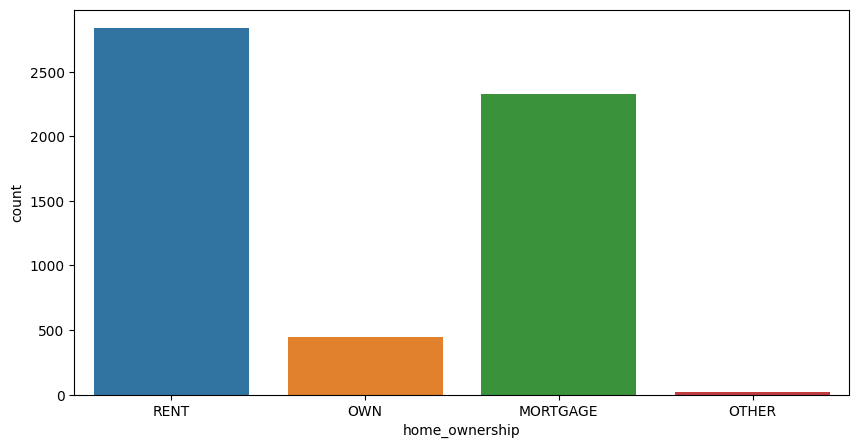

In [48]:
plt.figure(figsize=(10,5))
## Analyzing counts loan status
df['loan_status'].value_counts()
## Analyzing count of home_ownership
df['home_ownership'].value_counts()
sns.countplot(x="home_ownership",data=df[df['loan_status']=='Charged Off'])
## Analyzing counts of emp_length
df['emp_length'].value_counts()
## Analyzing counts of verification status
# Replacing 'Source Verified' with 'Verifed' as both signifies the same
df['verification_status'].value_counts()
df.replace('Source Verified','Verified',inplace = True)
df['verification_status'].value_counts()

Creating bins to make numerical variable categorical


In [53]:
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=6,precision =0.0,labels =['0k-25k','25k-50k','50k-75k','75k-100k','100k-125k','125k-150k'])
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,mths_since_last_delinq,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,int_rate_groups,annual_inc_groups
0,1077501,5000,5000,4975.00000,10.65000,10+ years,RENT,24000.00000,Verified,Fully Paid,...,NaN,13648,83.70%,9,0.00000,0.00000,5863.15519,5833.84000,10%-15%,0-25
1,1077430,2500,2500,2500.00000,15.27000,< 1 year,RENT,30000.00000,Verified,Charged Off,...,NaN,1687,9.40%,4,0.00000,0.00000,1008.71000,1008.71000,15%-20%,0-25
2,1077175,2400,2400,2400.00000,15.96000,10+ years,RENT,12252.00000,Not Verified,Fully Paid,...,NaN,2956,98.50%,10,0.00000,0.00000,3005.66684,3005.67000,15%-20%,0-25
3,1076863,10000,10000,10000.00000,13.49000,10+ years,RENT,49200.00000,Verified,Fully Paid,...,35.00000,5598,21%,37,0.00000,0.00000,12231.89000,12231.89000,10%-15%,0-25
5,1075269,5000,5000,5000.00000,7.90000,3 years,RENT,36000.00000,Verified,Fully Paid,...,NaN,7963,28.30%,12,0.00000,0.00000,5632.21000,5632.21000,5%-10%,0-25


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,mths_since_last_delinq,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,int_rate_groups,annual_inc_groups
0,1077501,5000,5000,4975.00000,10.65000,10+ years,RENT,24000.00000,Verified,Fully Paid,...,NaN,13648,83.70%,9,0.00000,0.00000,5863.15519,5833.84000,10%-15%,0-25
1,1077430,2500,2500,2500.00000,15.27000,< 1 year,RENT,30000.00000,Verified,Charged Off,...,NaN,1687,9.40%,4,0.00000,0.00000,1008.71000,1008.71000,15%-20%,0-25
2,1077175,2400,2400,2400.00000,15.96000,10+ years,RENT,12252.00000,Not Verified,Fully Paid,...,NaN,2956,98.50%,10,0.00000,0.00000,3005.66684,3005.67000,15%-20%,0-25
3,1076863,10000,10000,10000.00000,13.49000,10+ years,RENT,49200.00000,Verified,Fully Paid,...,35.00000,5598,21%,37,0.00000,0.00000,12231.89000,12231.89000,10%-15%,0-25
5,1075269,5000,5000,5000.00000,7.90000,3 years,RENT,36000.00000,Verified,Fully Paid,...,NaN,7963,28.30%,12,0.00000,0.00000,5632.21000,5632.21000,5%-10%,0-25


<Axes: xlabel='annual_inc_groups', ylabel='count'>

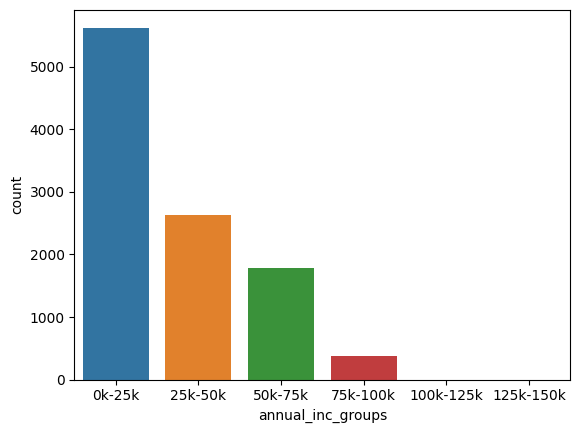

<Axes: xlabel='annual_inc_groups', ylabel='count'>

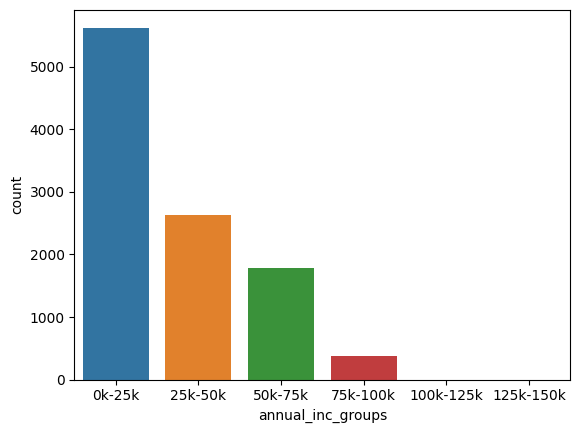

In [41]:
## Analyzing int_rate_groups
df['int_rate_groups'].value_counts()
sns.countplot(x="int_rate_groups",data=df[df['loan_status']=='Charged Off'])
## Analyzing Annual Income
sns.countplot(x="annual_inc_groups",data=df[df['loan_status']=='Charged Off'])



## OBSERVATIONS:
- Most defaulters were having 'RENT' followed by 'MORTGAGE' as home ownership
- Most Defaulters have 10+ Years of experience
- Most Defaulters were 'Verified'
- Most Defaulters have interest rate between 10-20%
- Most Defaulters had income less than 25k


### Segmented Univariate & Bivariate Analysis


<Axes: xlabel='annual_inc', ylabel='home_ownership'>

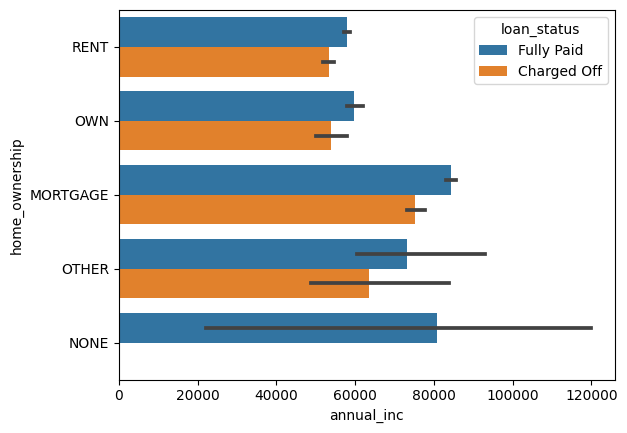

In [14]:
## Creating a new columns to find ratio of Loan Amount to Income
df['Loan Ratio'] = (df.loan_amnt/df.annual_inc)*100
df.head()
sns.barplot(data =df,x='annual_inc', y='home_ownership', hue ='loan_status')
## OBSERVATION -